In [1]:
"""
NAME: PATRICK KIMATHI KARIUKI
STUDENT ID: CS-DA02-25041
DATE: 22,  NOVEMBERR 2025
TASK: Assignment 10: Deep Learning
Description :  Apply your understanding of Artificial Neural Networks and
TensorFlow/Keras to build, train, evaluate, and document an image classification model using the MNIST dataset.
"""

'\nNAME: PATRICK KIMATHI KARIUKI\nSTUDENT ID: CS-DA02-25041\nDATE: 22,  NOVEMBERR 2025\nTASK: Assignment 10: Deep Learning\nDescription :  Apply your understanding of Artificial Neural Networks and TensorFlow/Keras to build, train, evaluate, and document an image classification model using the MNIST dataset. \n'

# Import the relevant libraries and modules

In [49]:
#import the relevant libraries and modules

#numpy
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
#seaborn
import seaborn as sns
# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
#sklearn
from sklearn.metrics import confusion_matrix, classification_report


# Load the MNIST dataset

In [50]:
#Load the MNIST dataset using tensorflow.keras.datasets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Preprocess the data

**Normalize the pixel values to a [0,1] range.**

In [51]:
#Preprocess the data
#Normarlive the pixel values to be in the range 0,1
X_train = X_train/255.0
X_test = X_test/255.0



**One-hot encode the labels using to_categorical.**

In [52]:
#Perform one-hot encoding on  categorical features
y_train_categ = to_categorical(y_train, num_classes=10)
y_test_categ = to_categorical(y_test, num_classes=10)


# Visualize at least 9 random images with their labels using matplotlib.

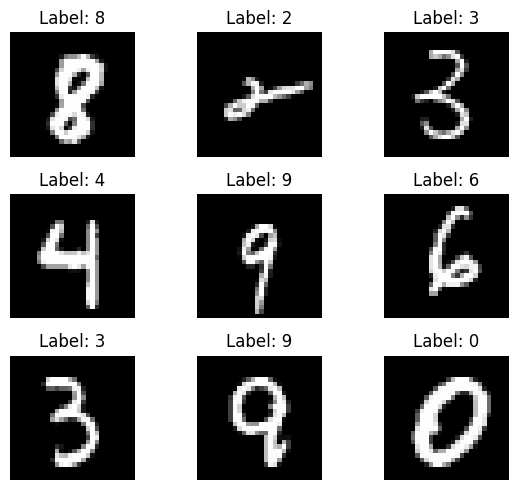

In [53]:
#Visualize at least 9 random images with their labels using matplotlib.
#select 9 indices randomly  to plot
selected_indices = np.random.choice(len(X_train), size=9, replace=False)

#set the plot figure size
plt.figure(figsize=(6, 5))

#use for loop to iterate through the indeices
for i, idx in enumerate(selected_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [55]:
#Print dataset shapes and confirm correct preprocessing.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Build the Artificial Neural Network Model (Sequential Model)

In [54]:
#Build the ANN using the sequential model
model = Sequential([
    #inlude the flattened layer as the input layer
    Flatten(input_shape=(28, 28)),

    #use the ReLU activation function
    #the first hidden later with 128 neurons
    Dense(128, activation='relu'),

    #specify the Dropout Layers at 0.3 for regularization
    Dropout(0.3),
    #the second hidden later with 64 neurons
    Dense(64, activation='relu'),
    #specify the Dropout Layers at 0.3 for regularization
    Dropout(0.3),

    #the output layer with 10 neurons for the 10 classes of the digits 0-9
    #and use the softmax activation function
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile with adam optimizer and categorical_crossentropyloss.

In [61]:
#Compile with adam optimizer and categorical_crossentropyloss.
model.compile(optimizer='adam', #use adam optimizer
              loss='categorical_crossentropy',
              #Use accuracy as the evaluation metric.
              metrics=['accuracy'])


# Train the mode

In [43]:
#Train the model for 10 epochs, using a batch_size of 128 and a validation_split of 0.1.
history = model.fit(X_train,
                    y_train_categ,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9164 - loss: 0.2872 - val_accuracy: 0.9513 - val_loss: 0.1646
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9191 - loss: 0.2742 - val_accuracy: 0.9525 - val_loss: 0.1582
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9227 - loss: 0.2637 - val_accuracy: 0.9563 - val_loss: 0.1476
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9263 - loss: 0.2489 - val_accuracy: 0.9618 - val_loss: 0.1397
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9326 - loss: 0.2339 - val_accuracy: 0.9618 - val_loss: 0.1342
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9355 - loss: 0.2246 - val_accuracy: 0.9647 - val_loss: 0.1261
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9373 - loss: 0.2153 - val_accuracy: 0.9655 - val_loss: 0.1232
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9386 - loss: 0.2095 - val_accuracy: 0.

# Evaluate the model

In [48]:
#Evaluate the model on the test set and report the final test accuracy.
test_loss, test_acc = model.evaluate(X_test, y_test_categ)
print(f'Test accuracy:\n {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 21.2392
Test accuracy:
 0.9399


# Plot training and validation accuracy/loss per epoch.

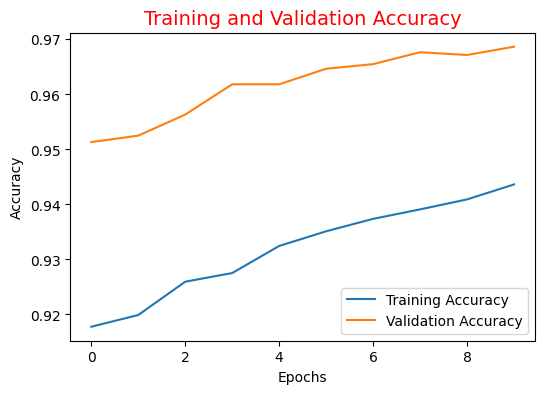

In [56]:
#Plot training and validation accuracy/loss per epoch.
#Visualize the model training history
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy',color="red", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Predictions

In [57]:
#Use model.predict() to get predictions on test data.
model_predictions = model.predict(X_test)
print(model_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0.11885689 0.11532855 0.091336   ... 0.10115713 0.07481972 0.093118  ]
 [0.10754675 0.14063764 0.07176128 ... 0.09786459 0.06752881 0.1031544 ]
 [0.12778541 0.09891641 0.08468848 ... 0.0749118  0.07662095 0.0948433 ]
 ...
 [0.09718177 0.12209611 0.09628033 ... 0.07098895 0.10050599 0.09311765]
 [0.07831612 0.13897218 0.08551724 ... 0.0866041  0.10538634 0.10726615]
 [0.11893508 0.14984149 0.07595482 ... 0.08097913 0.10604518 0.07898479]]


# Display a confusion matrix

Display a confusion matrix using seaborn.heatmap.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


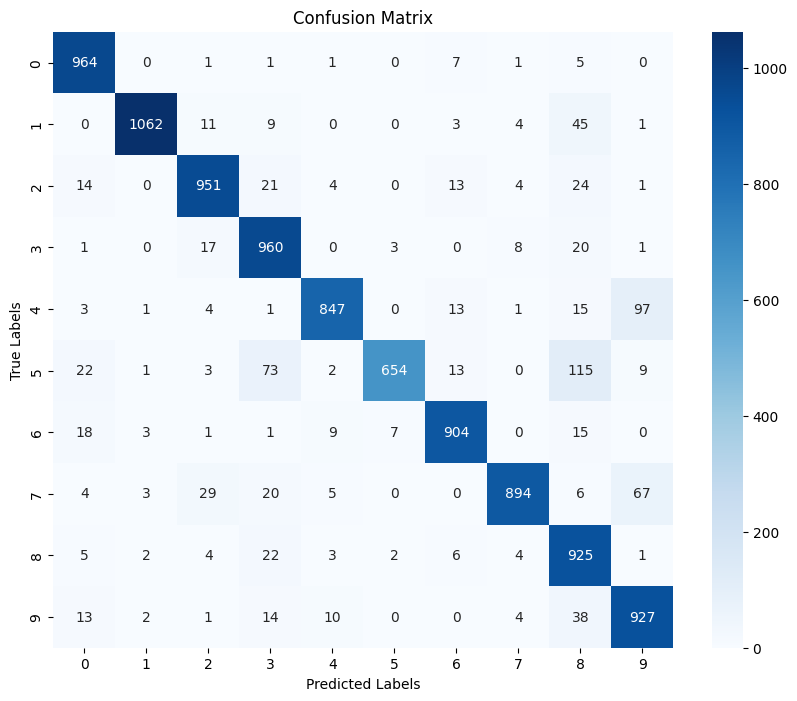

In [39]:
#Display a confusion matrix using seaborn.heatmap.
y_test_model_pred = model.predict(X_test)
y_pred_test= np.argmax(y_test_model_pred, axis=1)
y_test_labels = np.argmax(y_test_categ, axis=1)


#generate the confusion matrix heatmap in seaborn
cm = confusion_matrix(y_test_labels, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Print a classification report

Print a classification report showing precision, recall, and F1-score.

In [71]:
#Print a classification report showing precision, recall, and F1-score.
print(classification_report(y_test_labels, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.99      0.94      0.96      1135
           2       0.93      0.92      0.93      1032
           3       0.86      0.95      0.90      1010
           4       0.96      0.86      0.91       982
           5       0.98      0.73      0.84       892
           6       0.94      0.94      0.94       958
           7       0.97      0.87      0.92      1028
           8       0.77      0.95      0.85       974
           9       0.84      0.92      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



# Save the trained model in the native Keras format

In [ ]:
#Save the trained model in the native Keras format
model.save('mnist_model.h5')


In [ ]:
#relaod the model
loaded_model = keras.models.load_model('mnist_model.h5')

In [ ]:
# @title
#evaluate the  reloaded model
loaded_model.compile(optimizer='adam', #use adam optimizer
              loss='categorical_crossentropy',
              #Use accuracy as the evaluation metric.
              metrics=['accuracy'])
loaded_model.evaluate(X_test, y_test_categ)